# Finding better ways to predict myopia, or nearsightedness

failed—to improve their classification model when training on the whole dataset, believe that there 
might be distinct groups of patients that would be better to analyze separately.

To explore this possibility by using unsupervised learning.


In [293]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [294]:
df = pd.read_csv('myopia.csv')

In [295]:
df.head(100)

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.700000,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.290000,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.520000,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.730000,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.160000,14,0,0,0,4,4,1,0,0
5,6,1.744,22.139999,3.224,3.556,15.360000,10,6,2,1,19,44,0,1,0
6,6,0.683,22.330000,3.186,3.654,15.490000,12,7,2,1,8,36,0,1,0
7,6,1.272,22.389999,3.732,3.584,15.080000,12,0,0,0,8,8,0,0,0
8,7,1.396,22.620001,3.464,3.408,15.740000,4,0,3,1,3,12,0,0,0
9,6,0.972,22.740000,3.504,3.696,15.540000,30,5,1,0,10,27,0,0,0


In [296]:
df.drop("AGE",axis=1,inplace=True)

In [297]:
pd.set_option('display.max_rows',None)

In [298]:
df

,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,-0.052,21.889999,3.690,3.498,14.700000,45,8,0,0,10,34,1,1,1
1,0.608,22.379999,3.702,3.392,15.290000,4,0,1,1,7,12,1,1,0
2,1.179,22.490000,3.462,3.514,15.520000,14,0,2,0,10,14,0,0,0
3,0.525,22.200001,3.862,3.612,14.730000,18,11,0,0,4,37,0,1,1
4,0.697,23.290001,3.676,3.454,16.160000,14,0,0,0,4,4,1,0,0
5,1.744,22.139999,3.224,3.556,15.360000,10,6,2,1,19,44,0,1,0
6,0.683,22.330000,3.186,3.654,15.490000,12,7,2,1,8,36,0,1,0
7,1.272,22.389999,3.732,3.584,15.080000,12,0,0,0,8,8,0,0,0
8,1.396,22.620001,3.464,3.408,15.740000,4,0,3,1,3,12,0,0,0
9,0.972,22.740000,3.504,3.696,15.540000,30,5,1,0,10,27,0,0,0


In [299]:
df.shape

(618, 14)

In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SPHEQ      618 non-null    float64
 1   AL         618 non-null    float64
 2   ACD        618 non-null    float64
 3   LT         618 non-null    float64
 4   VCD        618 non-null    float64
 5   SPORTHR    618 non-null    int64  
 6   READHR     618 non-null    int64  
 7   COMPHR     618 non-null    int64  
 8   STUDYHR    618 non-null    int64  
 9   TVHR       618 non-null    int64  
 10  DIOPTERHR  618 non-null    int64  
 11  MOMMY      618 non-null    int64  
 12  DADMY      618 non-null    int64  
 13  MYOPIC     618 non-null    int64  
dtypes: float64(5), int64(9)
memory usage: 67.7 KB


In [301]:
true_labels = df.columns.to_list()

In [302]:
true_labels

['SPHEQ',
 'AL',
 'ACD',
 'LT',
 'VCD',
 'SPORTHR',
 'READHR',
 'COMPHR',
 'STUDYHR',
 'TVHR',
 'DIOPTERHR',
 'MOMMY',
 'DADMY',
 'MYOPIC']

In [303]:
true_labels = df.columns.values

In [304]:
true_labels

array(['SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR',
       'STUDYHR', 'TVHR', 'DIOPTERHR', 'MOMMY', 'DADMY', 'MYOPIC'],
      dtype=object)

In [305]:
true_labels = []
for column in df.columns:
    column_index = df.columns.get_loc(column)
    true_labels.append(column_index)

In [306]:
true_labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

In [307]:
df.duplicated().sum()

0

In [308]:
df.isna().sum()

SPHEQ        0
AL           0
ACD          0
LT           0
VCD          0
SPORTHR      0
READHR       0
COMPHR       0
STUDYHR      0
TVHR         0
DIOPTERHR    0
MOMMY        0
DADMY        0
MYOPIC       0
dtype: int64

In [309]:
df.dropna(inplace=True)

In [310]:
df.isna().sum()

SPHEQ        0
AL           0
ACD          0
LT           0
VCD          0
SPORTHR      0
READHR       0
COMPHR       0
STUDYHR      0
TVHR         0
DIOPTERHR    0
MOMMY        0
DADMY        0
MYOPIC       0
dtype: int64

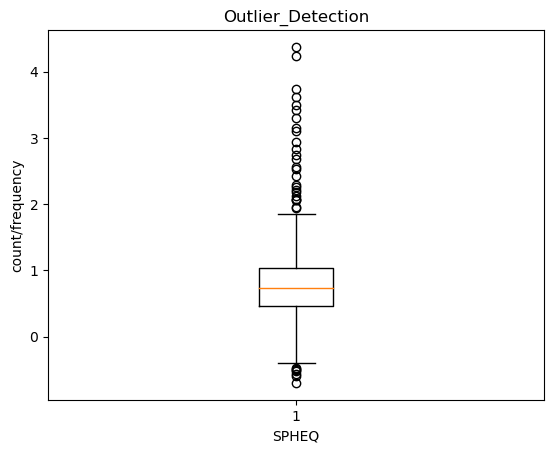

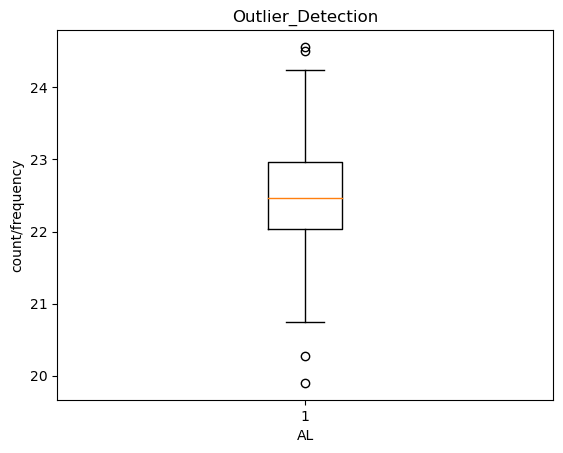

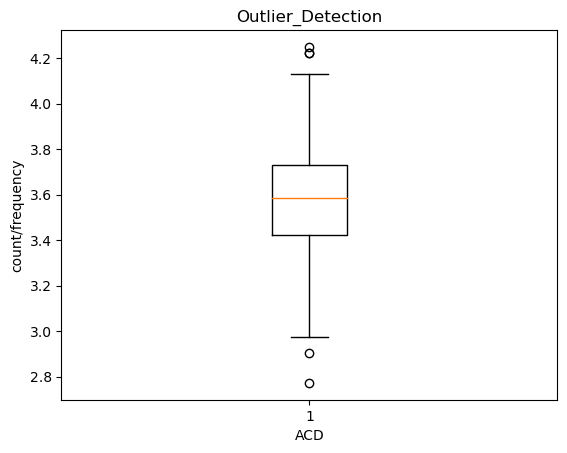

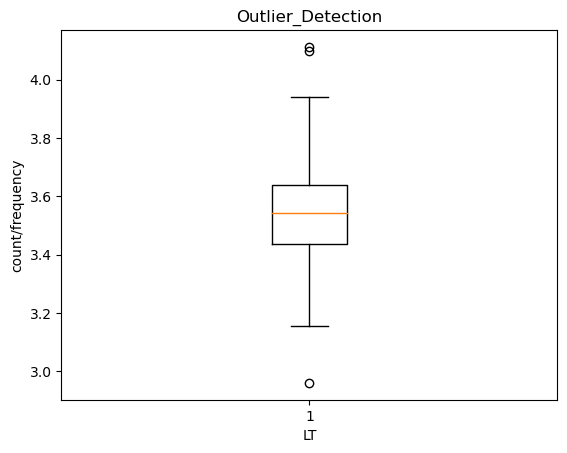

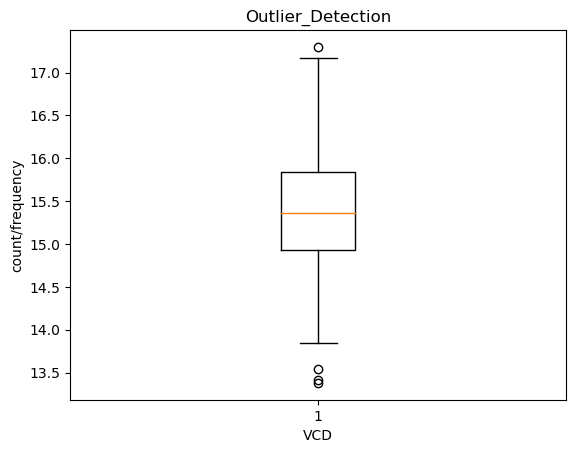

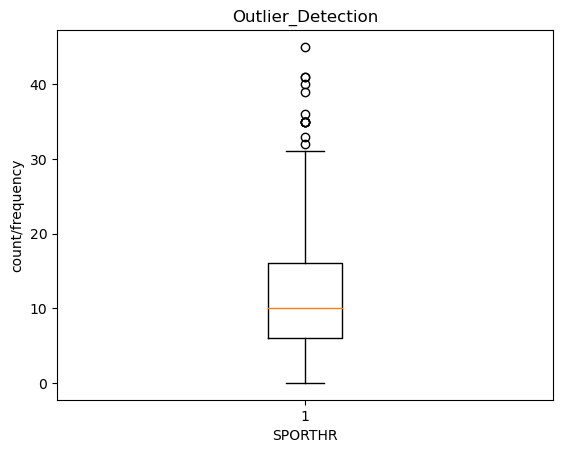

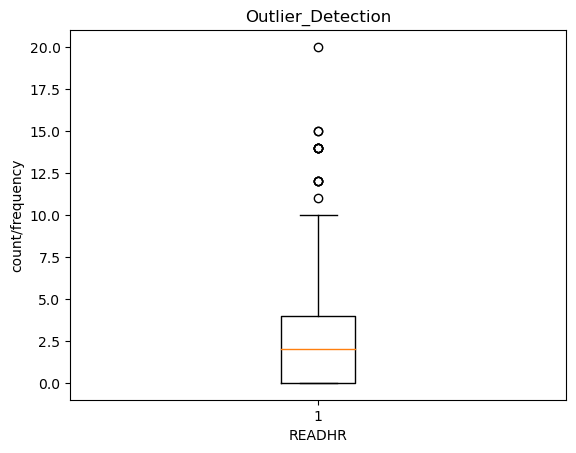

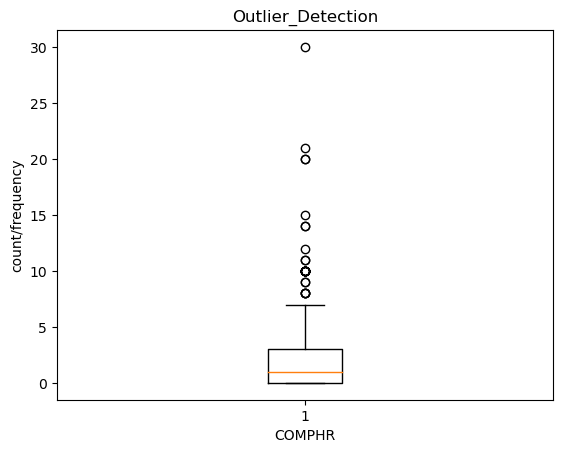

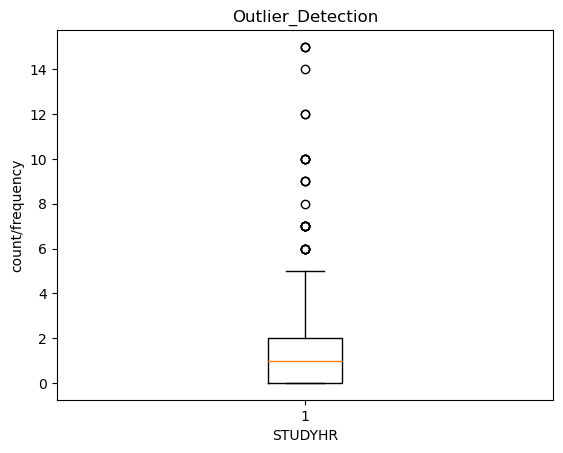

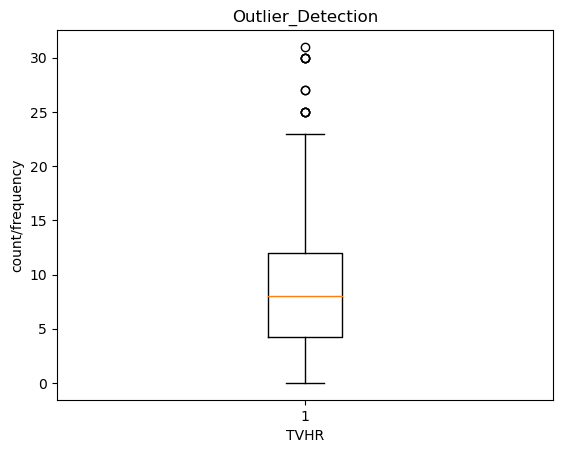

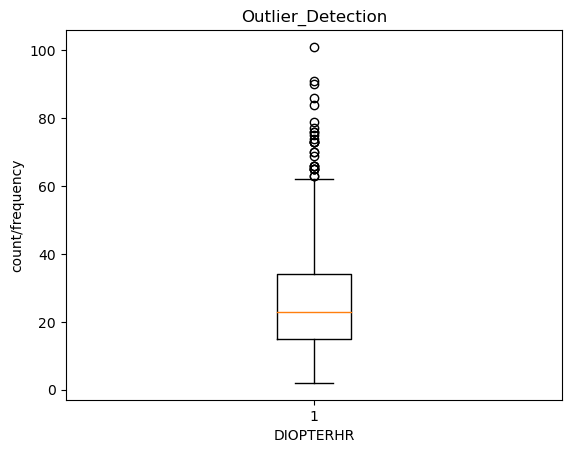

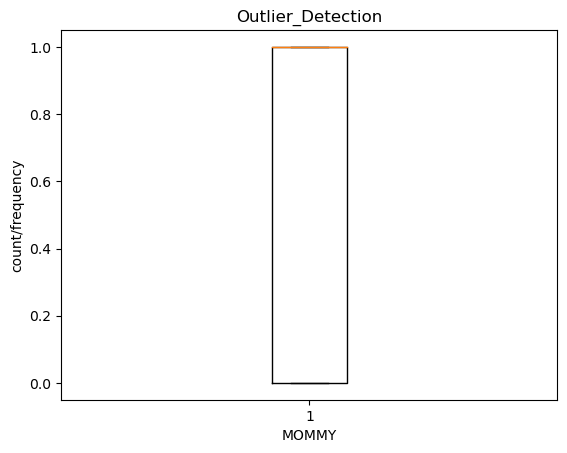

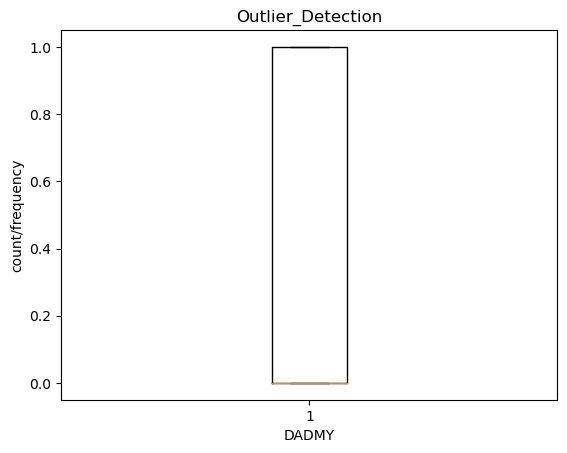

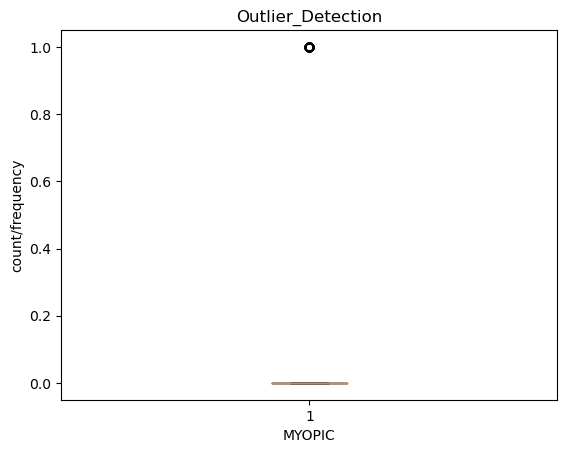

In [311]:
num_cols = df.select_dtypes(include=['float','int']).columns.to_list()
for i in num_cols:
    plt.boxplot(df[i])
    plt.title('Outlier_Detection')
    plt.xlabel(i)
    plt.ylabel('count/frequency')
    plt.show()

In [312]:
num_col = df.select_dtypes(include=['float','int']).columns.to_list()
for i in num_col:
    if df[i].dtypes != 'object':
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3 - Q1
        
        upper = Q3 + 1.5*IQR
        lower = Q1 - 1.5*IQR
        df = df[(df[i] >= lower) & (df[i] <= upper)]

In [313]:
df.shape

(423, 14)

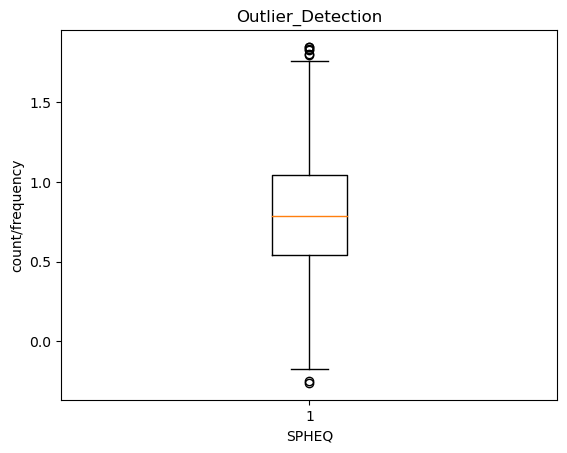

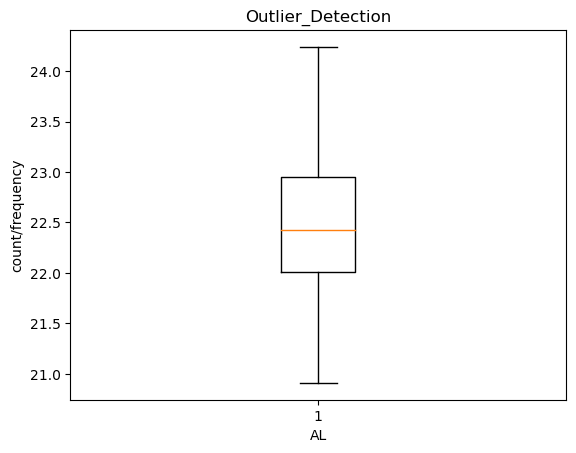

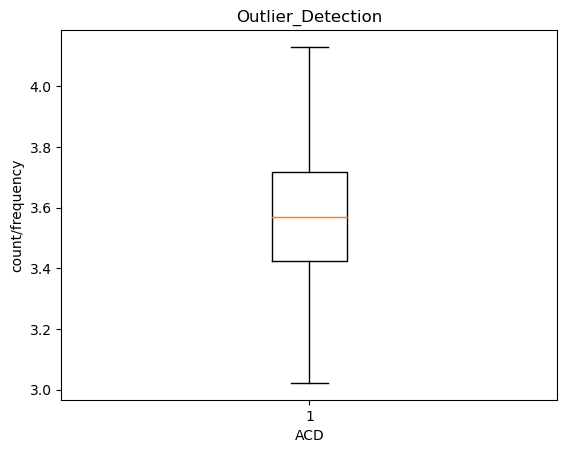

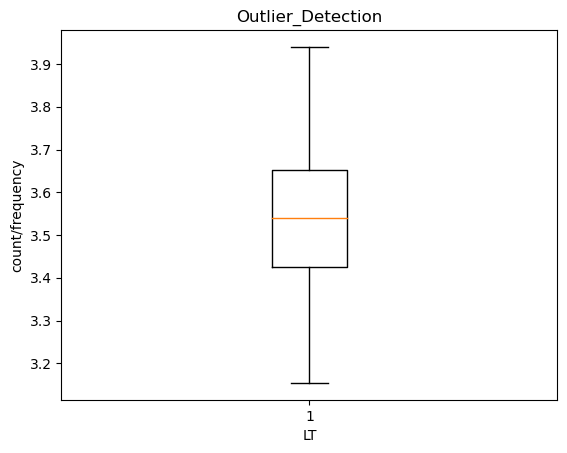

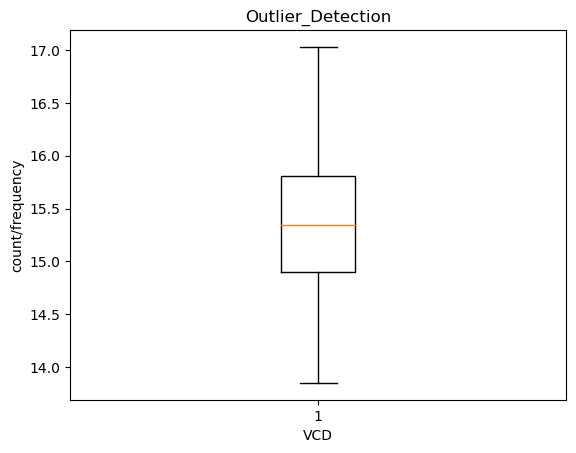

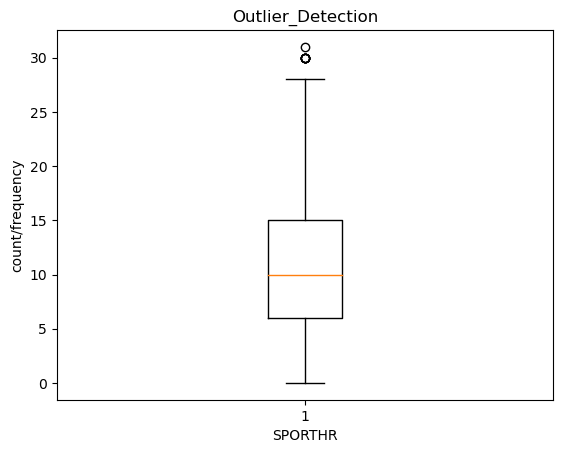

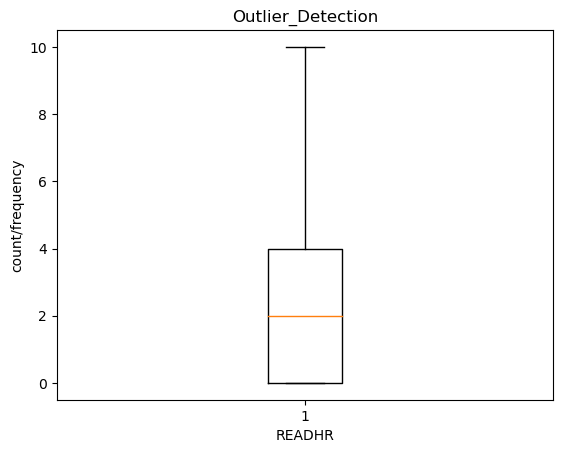

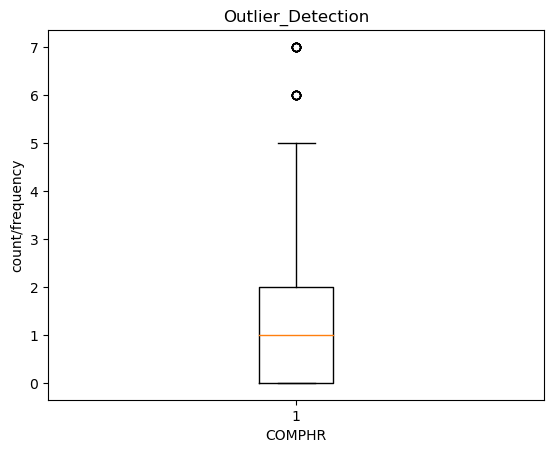

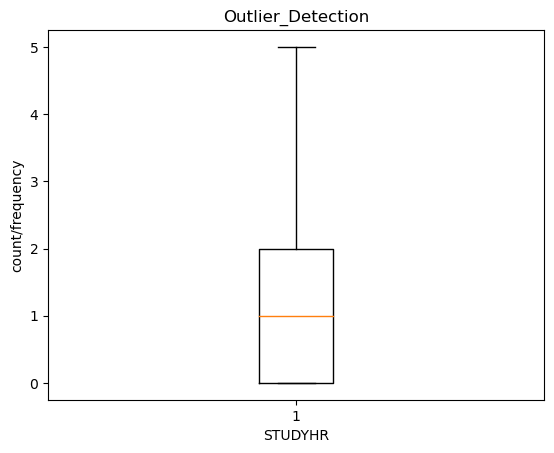

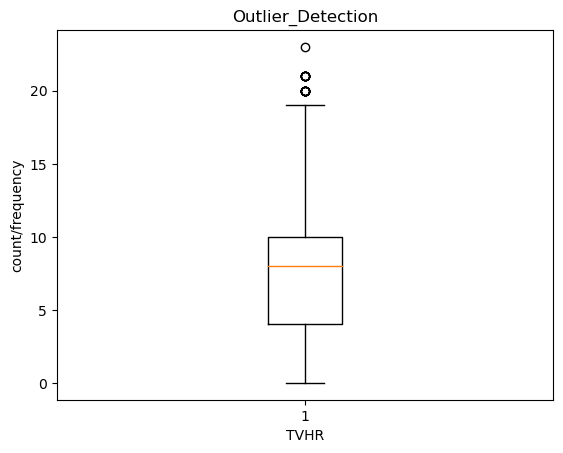

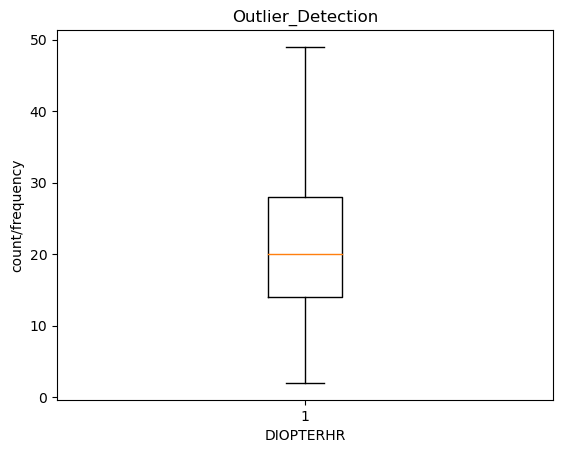

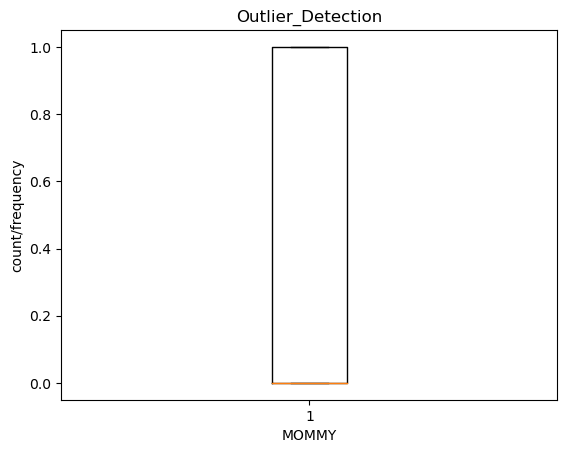

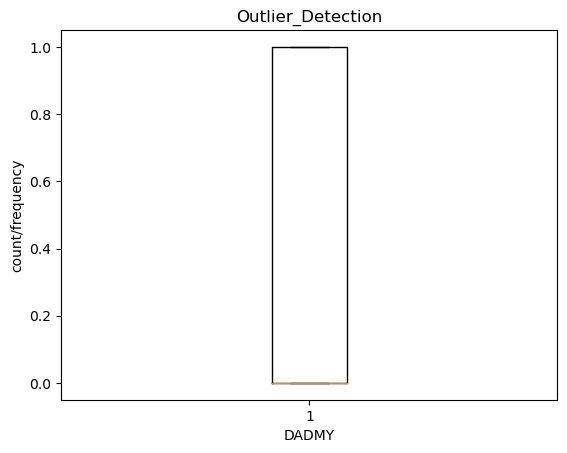

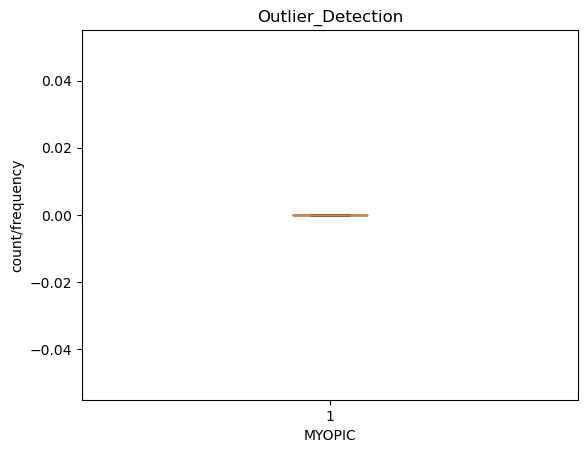

In [314]:
num_cols = df.select_dtypes(include=['float','int']).columns.to_list()
for i in num_cols:
    plt.boxplot(df[i])
    plt.title('Outlier_Detection')
    plt.xlabel(i)
    plt.ylabel('count/frequency')
    plt.show()

In [315]:
# num_col = df.select_dtypes(include=['float','int']).columns.to_list()
# for i in num_col:
#     if df[i].dtypes != 'object':
#         Min_cap = df[i].quantile(0.05)
#         Max_cap = df[i].quantile(0.95)
        
#         df = df[(df[i] >= Min_cap) & (df[i] <= Max_cap)]

In [316]:
df.shape

(423, 14)

In [317]:
# num_col = df.select_dtypes(include=['float','int']).columns.to_list()
# for i in num_col:
#     if df[i].dtypes != 'object':
#         Min_cap = df[i].quantile(0.05)
#         Max_cap = df[i].quantile(0.95)
        
#         df_clean = df[(df[i] > Min_cap) & (df[i] < Max_cap)]
        
#         Outlier_percent_col = ((df.shape[0] - df_clean.shape[0])/df.shape[0])*100
        
#         print('Outliers percentage in',i,'is', Outlier_percent_col,'%')

In [318]:
# # Calculate the quantiles for columns with potential outliers
# max_thresold_BALANCE = df["BALANCE"].quantile(0.95)
# min_thresold_BALANCE = df["BALANCE"].quantile(0.05)
# max_thresold_CREDIT_LIMIT = df["CREDIT_LIMIT"].quantile(0.95)
# min_thresold_CREDIT_LIMIT = df["CREDIT_LIMIT"].quantile(0.05)
# max_thresold_PAYMENTS = df["PAYMENTS"].quantile(0.95)
# min_thresold_PAYMENTS = df["PAYMENTS"].quantile(0.05)

# # Filter the DataFrame to exclude rows with outliers
# df = df[
#     (df["CREDIT_LIMIT"] < max_thresold_CREDIT_LIMIT) &
#     (df["CREDIT_LIMIT"] > min_thresold_CREDIT_LIMIT) &
#     (df["BALANCE"] < max_thresold_BALANCE) &
#     (df["BALANCE"] > min_thresold_BALANCE) &
#     (df["PAYMENTS"] < max_thresold_PAYMENTS) &
#     (df["PAYMENTS"] > min_thresold_PAYMENTS)
# ]

In [319]:
df.shape

(423, 14)

In [320]:
df['MYOPIC'].value_counts()

0    423
Name: MYOPIC, dtype: int64

In [321]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SPHEQ,423.0,0.812312,0.410441,-0.260,0.5415,0.789,1.0435,1.848000
AL,423.0,22.480000,0.663391,20.910,22.0100,22.430,22.9550,24.240000
ACD,423.0,3.576643,0.216261,3.022,3.4240,3.570,3.7180,4.130000
LT,423.0,3.541707,0.152291,3.154,3.4245,3.540,3.6530,3.940000
VCD,423.0,15.361749,0.652519,13.850,14.9000,15.340,15.8100,17.030001
SPORTHR,423.0,11.503546,6.957853,0.000,6.0000,10.000,15.0000,31.000000
READHR,423.0,2.276596,2.348055,0.000,0.0000,2.000,4.0000,10.000000
COMPHR,423.0,1.524823,1.731701,0.000,0.0000,1.000,2.0000,7.000000
STUDYHR,423.0,1.106383,1.356233,0.000,0.0000,1.000,2.0000,5.000000
TVHR,423.0,8.302600,4.979881,0.000,4.0000,8.000,10.0000,23.000000


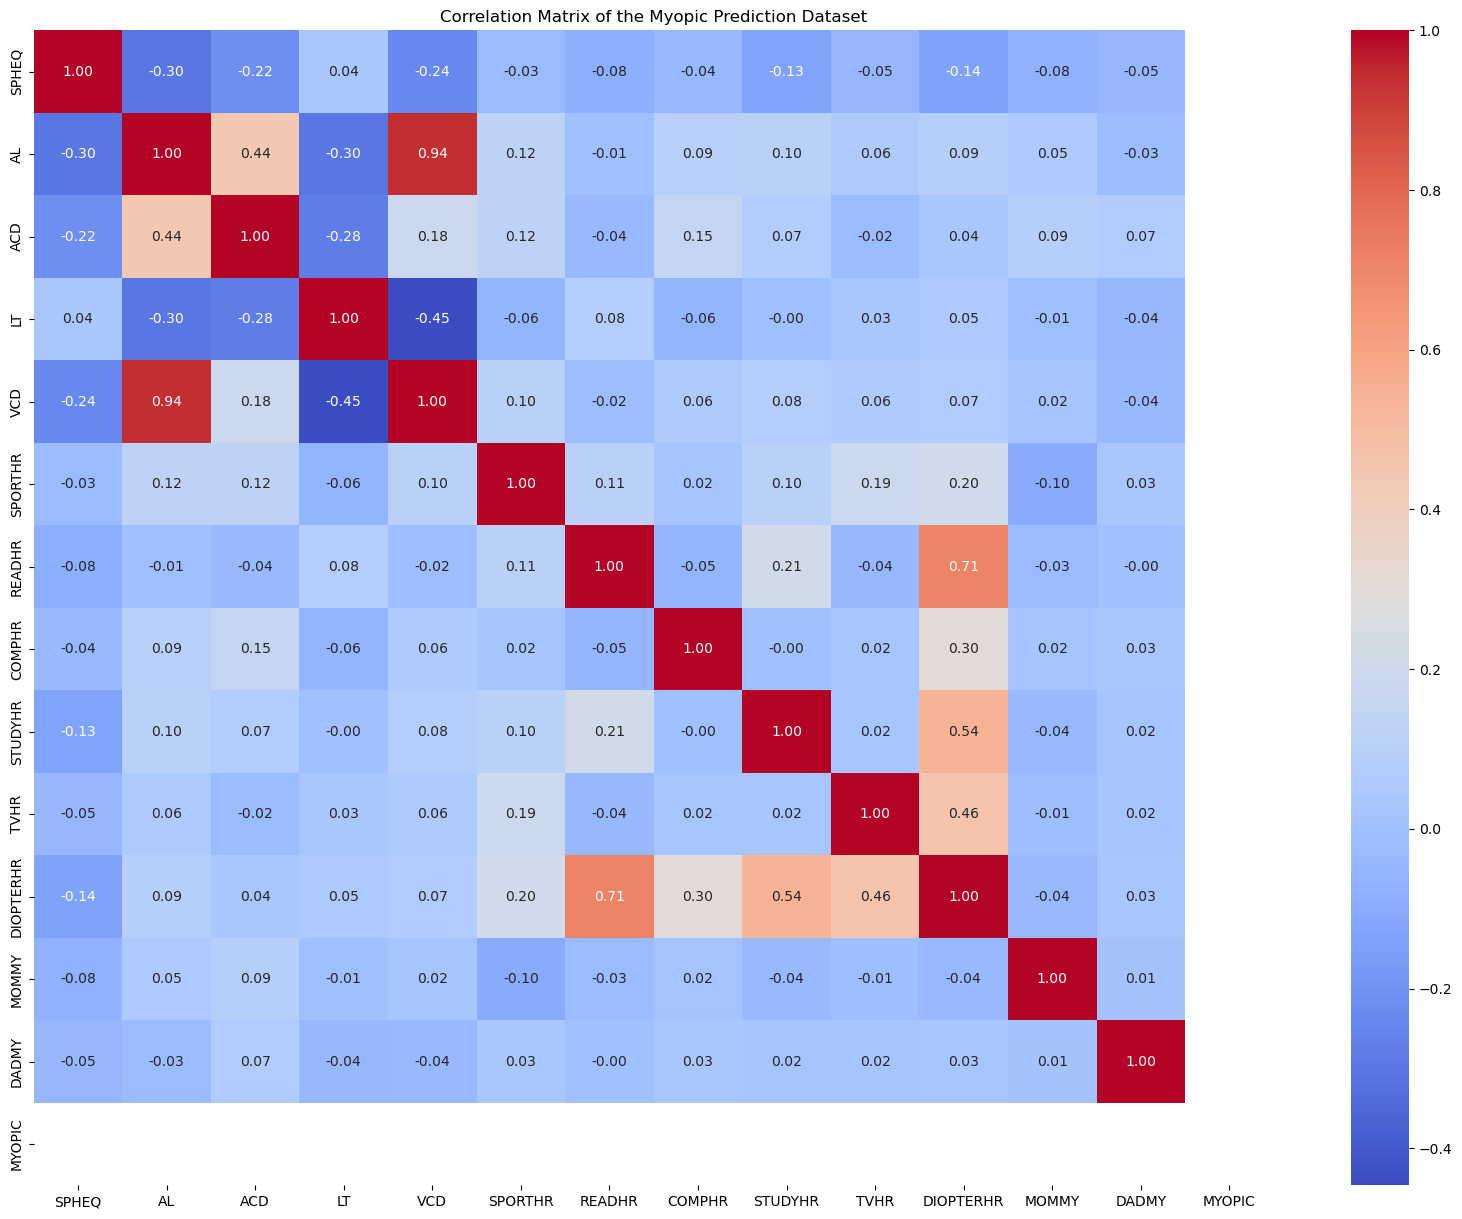

In [322]:
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt='.2f')
plt.title('Correlation Matrix of the Myopic Prediction Dataset')
plt.show()

In [323]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(df)

In [324]:
from sklearn.decomposition import PCA

pca = PCA(n_components=len(df.columns))
pca_ft = pca.fit(X)

pca_dt = pca_ft.transform(X)
pca_dt.shape

(423, 14)

In [325]:
explained_var_ratio = pca_ft.explained_variance_ratio_
explained_var_ratio

array([2.03620951e-01, 1.63218895e-01, 8.94286682e-02, 8.75465581e-02,
       7.95114282e-02, 7.70800556e-02, 6.82209036e-02, 6.72396823e-02,
       6.07959626e-02, 5.44117158e-02, 4.89239225e-02, 1.25742052e-06,
       3.82773619e-33, 0.00000000e+00])

In [326]:
print('Explained Variance Ratio of Components of Dimensions/Feature Columns :')
for  i in range(len(explained_var_ratio)):
    print(f"Component {i+1} : {explained_var_ratio[i]:.2f}")

Explained Variance Ratio of Components of Dimensions/Feature Columns :
Component 1 : 0.20
Component 2 : 0.16
Component 3 : 0.09
Component 4 : 0.09
Component 5 : 0.08
Component 6 : 0.08
Component 7 : 0.07
Component 8 : 0.07
Component 9 : 0.06
Component 10 : 0.05
Component 11 : 0.05
Component 12 : 0.00
Component 13 : 0.00
Component 14 : 0.00


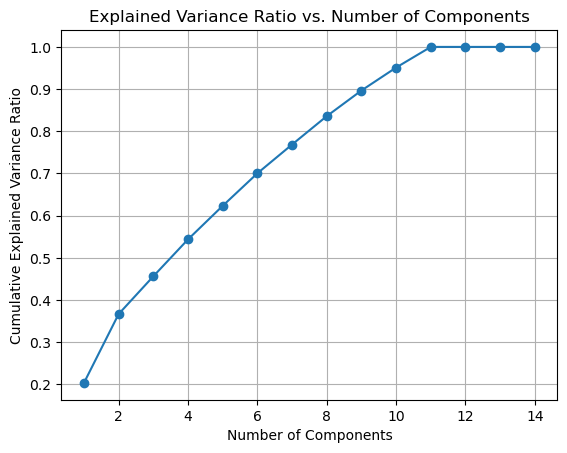

In [327]:
n_components = len(df.columns)
cumulative_variance_ratio = np.cumsum(explained_var_ratio)
plt.plot(range(1, n_components + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Components')
plt.grid()
plt.show()

In [328]:
pca = PCA(random_state=11,n_components=2) # Above graph clear says with two components taken,there is
                                          #HighestValue of Explained variance,hence princ_components=2

In [329]:
pc = pca.fit_transform(X)

In [330]:
pc

array([[-1.69008312e-01, -1.61724569e+00],
       [-6.55421636e-01, -9.61872673e-01],
       [ 6.62260661e-01, -2.88690803e+00],
       [-3.32293986e-01,  3.01257546e+00],
       [-1.24257860e-02,  2.34310464e+00],
       [-1.30121811e+00, -1.39322275e+00],
       [-5.95914464e-01, -1.65755520e+00],
       [ 4.11644332e-01,  1.25494557e+00],
       [ 9.66411039e-01, -1.27995816e+00],
       [ 1.19858849e+00, -4.81705895e-01],
       [ 2.42628733e+00, -2.24774151e+00],
       [ 1.60697399e+00, -9.46238080e-01],
       [ 1.97807012e+00,  4.60184412e-01],
       [ 3.42660219e-01,  2.04565341e+00],
       [ 6.71874066e-02,  5.49085219e-01],
       [ 4.22907276e-01,  1.85950905e+00],
       [-5.67702544e-01, -1.48475521e+00],
       [-6.81889086e-01,  3.95351135e-01],
       [ 9.88973070e-01,  3.67978778e+00],
       [ 2.41763350e+00,  8.96773663e-01],
       [ 1.16863219e+00, -1.23754681e+00],
       [ 1.05012628e+00, -9.43076085e-01],
       [-7.21781617e-01,  8.68050986e-01],
       [ 1.

In [331]:
df_pca = pd.DataFrame(pc,columns=['Pc1','Pc2'])

In [332]:
df_pca

,Pc1,Pc2
0,-0.169008,-1.617246
1,-0.655422,-0.961873
2,0.662261,-2.886908
3,-0.332294,3.012575
4,-0.012426,2.343105
5,-1.301218,-1.393223
6,-0.595914,-1.657555
7,0.411644,1.254946
8,0.966411,-1.279958
9,1.198588,-0.481706


In [333]:
# Using K_Means as Clustering Technique

from sklearn.cluster import KMeans

k = KMeans(n_clusters=12)
y_pred = k.fit_predict(df)

In [334]:
k

KMeans(n_clusters=12)

In [335]:
y_pred

array([ 0,  3,  7,  5,  1,  7,  0,  9,  3,  8,  0, 11,  8,  8,  3,  1,  7,
        3,  5,  9,  6, 11,  8,  1,  8,  2,  8, 10, 10,  4,  0,  7,  2,  4,
        5,  0,  0,  7,  0,  6,  1,  2,  4,  0,  4,  9,  4,  7,  2,  0,  4,
       11,  3,  1,  8,  0,  8,  3,  3, 11,  3,  4,  6,  0,  4,  1,  6,  8,
        8, 11, 10,  9, 10,  5,  0,  4,  3,  7,  3,  3,  2,  0,  4,  8, 11,
        0,  0, 11,  2,  5, 11,  0,  7,  4, 11,  4,  3,  0,  4,  2,  2,  4,
        4,  4,  8,  7, 11,  0,  4,  7,  9,  3,  3,  2,  5,  0,  0,  1,  3,
        6,  7,  0,  5,  0, 11, 11,  4,  6, 10,  7,  0,  2,  3,  8,  3,  5,
        7,  2,  0,  5,  3, 11,  2,  2,  7,  1, 11,  0,  1,  2,  2,  3,  4,
        0,  2,  0,  0, 11, 11,  5,  1, 11,  0, 10,  0,  2,  1,  1,  2,  4,
        3,  3,  5,  4,  9, 11, 10,  3,  2,  0,  4,  2,  0,  3,  6,  0,  7,
        0,  0,  3,  7,  6,  0,  2,  0,  3,  8,  4,  7,  4, 10,  8,  2,  0,
        3,  1,  0,  3,  0,  4,  5,  3,  0,  6,  5,  2,  3, 11,  9, 10,  3,
        9,  3,  1,  4,  4

In [336]:
df['cluster'] = ypred

In [337]:
df

,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC,cluster
1,0.608,22.379999,3.702,3.392,15.290000,4,0,1,1,7,12,1,1,0,9
2,1.179,22.490000,3.462,3.514,15.520000,14,0,2,0,10,14,0,0,0,1
4,0.697,23.290001,3.676,3.454,16.160000,14,0,0,0,4,4,1,0,0,0
5,1.744,22.139999,3.224,3.556,15.360000,10,6,2,1,19,44,0,1,0,7
6,0.683,22.330000,3.186,3.654,15.490000,12,7,2,1,8,36,0,1,0,10
7,1.272,22.389999,3.732,3.584,15.080000,12,0,0,0,8,8,0,0,0,0
8,1.396,22.620001,3.464,3.408,15.740000,4,0,3,1,3,12,0,0,0,9
9,0.972,22.740000,3.504,3.696,15.540000,30,5,1,0,10,27,0,0,0,6
13,0.987,22.879999,3.702,3.266,15.920000,14,3,0,1,4,16,0,0,0,3
14,0.169,22.980000,3.504,3.556,15.920000,10,0,2,0,20,24,1,0,0,4


In [338]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]
df3 = df[df.cluster==3]
df4 = df[df.cluster==4]
df5 = df[df.cluster==5]
df7 = df[df.cluster==6]
df8 = df[df.cluster==7]
df9 = df[df.cluster==8]
df10 = df[df.cluster==9]
df11 = df[df.cluster==10]
df12 = df[df.cluster==11]

In [339]:
df2

,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC,cluster
18,1.207,22.379999,3.370,3.598,15.41,18,0,0,5,18,33,0,0,0,2
24,1.401,23.959999,3.820,3.724,16.41,25,5,0,2,10,31,0,1,0,2
32,1.091,22.959999,3.624,3.422,15.92,14,4,1,1,14,31,1,1,0,2
60,0.609,23.020000,3.556,3.668,15.80,15,6,2,1,7,32,0,1,0,2
78,0.717,22.360001,3.462,3.780,15.12,14,4,1,3,11,34,0,1,0,2
93,0.527,23.250000,3.730,3.425,16.10,14,5,0,3,7,31,0,1,0,2
103,1.461,21.110001,3.396,3.668,14.05,21,7,0,0,11,32,0,0,0,2
146,0.733,22.080000,3.732,3.498,14.85,20,4,1,0,14,28,0,1,0,2
162,0.508,22.969999,3.756,3.468,15.74,30,0,7,3,7,30,0,1,0,2
167,1.515,21.570000,3.278,3.508,14.78,20,3,1,1,14,28,0,1,0,2


In [340]:
df2.shape

(33, 15)

In [341]:
df1

,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC,cluster
2,1.179,22.490000,3.462,3.514,15.520000,14,0,2,0,10,14,0,0,0,1
47,1.089,22.969999,3.704,3.438,15.820000,10,0,1,1,10,15,0,1,0,1
57,0.934,23.190001,3.916,3.238,16.040001,8,1,3,0,9,18,1,1,0,1
59,0.596,22.450001,3.488,3.710,15.250000,5,2,0,1,10,19,0,1,0,1
66,0.770,22.590000,3.410,3.556,15.620000,10,0,0,0,10,10,0,0,0,1
84,0.477,21.910000,3.250,3.612,15.050000,10,2,1,0,7,15,0,1,0,1
89,0.396,23.180000,3.304,3.654,16.219999,8,0,1,0,14,16,1,1,0,1
92,0.721,23.549999,3.822,3.598,16.129999,4,0,2,0,14,18,1,1,0,1
108,0.852,22.309999,3.316,3.540,15.450000,10,0,2,0,15,19,1,1,0,1
120,0.715,22.160000,3.250,3.808,15.100000,2,1,0,0,14,17,1,1,0,1


In [342]:
df1.shape

(42, 15)

In [343]:
ssd = []
for i in range(1,12):
    k = KMeans(n_clusters=i)
    k.fit(df)
    ssd.append(k.inertia_)

In [344]:
ssd

[87576.65909824091,
 51242.05882905314,
 41676.34825944303,
 34419.65307593548,
 29655.583841192674,
 26630.072253932598,
 23845.615310913163,
 21457.386038047192,
 19647.38263430062,
 17990.44336394314,
 16572.556176711998]

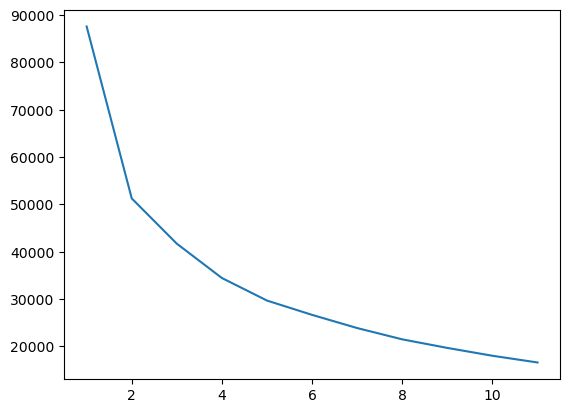

In [345]:
plt.plot(range(1,12),ssd)

In [346]:
# Since above Elbow Method does not confirm Optimal Value of K,let us go to next Silhouette Score
#  technique 

In [347]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 10):  # Try different values of K
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    score = silhouette_score(X, cluster_labels)
    silhouette_scores.append(score)

df_sil_scr = pd.DataFrame(silhouette_scores, columns = ['Silhouette_scores'])    
df_sil_scr


,Silhouette_scores
0,0.125645
1,0.123439
2,0.101557
3,0.090031
4,0.083949
5,0.087272
6,0.091086
7,0.088395


In [348]:
optimal_k = df_sil_scr['Silhouette_scores'].idxmax() + 2  # since range started from 2 to 10
print('Optimal Value of K that can be taken based on index of maxiumum value of Silhouette Score is ', 
      optimal_k)

Optimal Value of K that can be taken based on index of maxiumum value of Silhouette Score is  2


In [349]:
y_pred = y_pred[:14]

In [350]:
# To assess the quality of clusters in relation to the imbalanced target

from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

ari_score = adjusted_rand_score(true_labels, y_pred)

nmi_score = normalized_mutual_info_score(true_labels, y_pred)

print('Adjusted Random Score is: ',ari_score)
print('Normalized Mutual Info Score is: ',nmi_score)

Adjusted Random Score is:  0.0
Normalized Mutual Info Score is:  0.8548836536751555


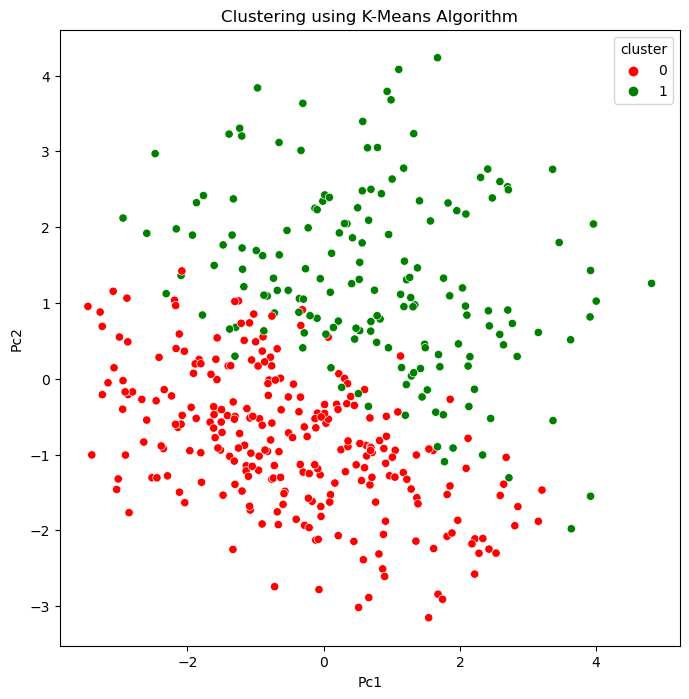

In [351]:
kmeans_model=KMeans(2)
kmeans_model.fit_predict(df)
pca_df_kmeans= pd.concat([df_pca,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)
plt.figure(figsize=(8,8))

ax=sns.scatterplot(x="Pc1",y="Pc2",hue="cluster",data=pca_df_kmeans,palette=['red','green'])
plt.title("Clustering using K-Means Algorithm")
plt.show()

In [352]:
cluster_labels = kmeans_model.labels_

In [353]:
cluster_labels

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,

In [354]:
df['Cluster'] = cluster_labels

In [355]:
df['Cluster'].value_counts()

0    258
1    165
Name: Cluster, dtype: int64

In [356]:
clusters_means = df.groupby('Cluster').mean()

In [357]:
clusters_medians = df.groupby('Cluster').median()

In [358]:
print("Different Cluster Means by each feature/column:")
print(clusters_means)

Different Cluster Means by each feature/column:
            SPHEQ         AL       ACD        LT        VCD    SPORTHR  \
Cluster                                                                  
0        0.851349  22.451783  3.575729  3.536422  15.339729  10.077519   
1        0.751273  22.524121  3.578073  3.549970  15.396182  13.733333   

           READHR    COMPHR   STUDYHR       TVHR  DIOPTERHR     MOMMY  \
Cluster                                                                 
0        1.255814  1.182171  0.674419   6.441860  14.596899  0.515504   
1        3.872727  2.060606  1.781818  11.212121  32.296970  0.418182   

            DADMY  MYOPIC   cluster  
Cluster                              
0        0.472868     0.0  4.589147  
1        0.503030     0.0  6.248485  


Recommendations or Inferences or Conclusions :

INTERNATIONALLY TAKEN STANDARD VALUES OF:
AL:24 , ACD(MEAN): 3.11 ,  LT : 3.5 to 3.75,   VCD: 14.42 TO 16 ;
so,these features can be left bec they do not or in very negligible manner influence myopic/non-myopic nature of child on analysing below clusters features mean values having very neglible to very less differences from these standard values.

Cluster 0: 

SPHEQ : 0.751273
AL : 22.524121
ACD : 3.578073
LT : 3.549970
VCD : 15.396182   ;  SPORTHR : 13.733333 
READHR: 3.872727 ; COMPHR: 2.060606 ; STUDYHR: 1.781818 ; TVHR : 11.212121  
DIOPTERHR: given by (3× (READHR + STUDYHR) + 2 × COMPHR + TVHR) : 23.648352
MOMMY : 0.418182
DADMY : 0.503030


Cluster 1: 

SPHEQ :  0.851349
AL : 22.451783
ACD : 3.575729
LT : 3.536422
VCD : 15.339729   ;  SPORTHR : 10.077519
READHR: 1.255814 ; COMPHR: 1.182171 ; STUDYHR: 0.674419 ; TVHR : 6.441860  
DIOPTERHR: given by (3× (READHR + STUDYHR) + 2 × COMPHR + TVHR) : 14.596899
MOMMY : 0.515504 
DADMY : 0.472868


SPHEQ has very least influence on myopic/non-myopic nature of child

DIOPTERHR feature is the most influencing feature Column which turn is actually influenced by TVHR,READHR,STUDYHR,COMPHR feature Columns bec it is computed by these variables only.
So,these five feature columns can greatly influence myopic/non-myopic nature of child.

SPORTHR feature has less influence on myopic/non-myopic nature of child

MOMMY and DADMY features have very least influence on myopic/non-myopic nature of child


<!-- Cluster 2: 

SPHEQ : 0.835442
AL : 22.383097
ACD : 3.573027
LT : 3.534708
VCD : 15.275398
READHR: 1.203540 ; COMPHR: 1.203540 ; STUDYHR: 0.637168 ; TVHR : 4.079646  
DIOPTERHR: given by (3× (READHR + STUDYHR) + 2 × COMPHR + TVHR) : 12.008850
MOMMY : 0.566372
DADMY : 0.451327

Cluster 3: 

SPHEQ : 0.878327
AL : 22.515182
ACD : 3.597500
LT : 3.530418
VCD : 15.387364
READHR: 1.218182 ; COMPHR: 1.145455 ; STUDYHR: 0.727273 ; TVHR : 7.500000  
DIOPTERHR: given by (3× (READHR + STUDYHR) + 2 × COMPHR + TVHR): 15.627273
MOMMY : 0.418182
DADMY : 0.472727

Cluster 4: 

SPHEQ : 0.794865
AL : 22.445577
ACD : 3.557750
LT : 3.568692
VCD : 15.319615
READHR: 4.134615 ; COMPHR: 1.884615 ; STUDYHR: 1.769231 ; TVHR : 10.961538  
DIOPTERHR: given by (3× (READHR + STUDYHR) + 2 × COMPHR + TVHR): 32.442308
MOMMY : 0.403846
DADMY : 0.480769 -->

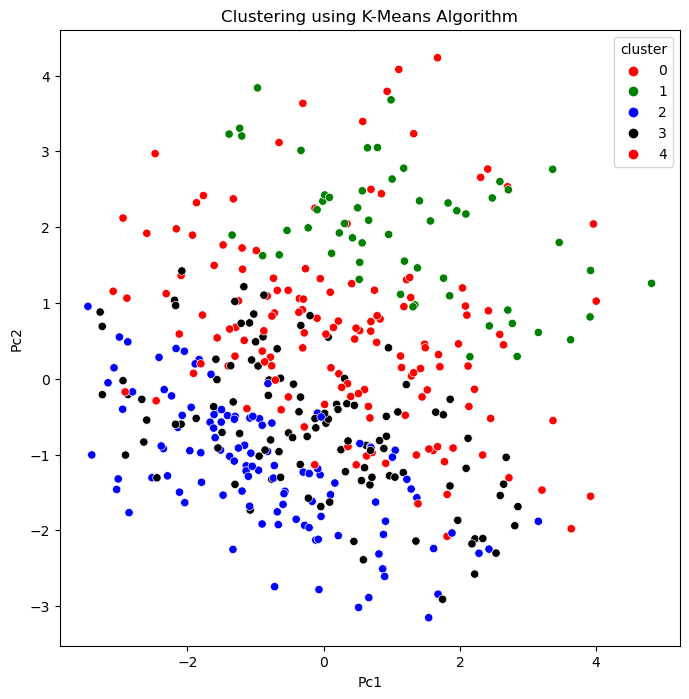

In [102]:
kmeans_model=KMeans(5)
kmeans_model.fit_predict(df)
pca_df_kmeans= pd.concat([df_pca,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)
plt.figure(figsize=(8,8))

ax=sns.scatterplot(x="Pc1",y="Pc2",hue="cluster",data=pca_df_kmeans,palette=['red','green','blue','black'])
plt.title("Clustering using K-Means Algorithm")
plt.show()

In [103]:
cluster_labels = kmeans_model.labels_

In [143]:
cluster_labels

array([2, 3, 2, 1, 1, 3, 2, 4, 3, 0, 2, 0, 0, 4, 3, 1, 2, 3, 1, 4, 3, 2,
       0, 1, 4, 4, 0, 4, 1, 0, 2, 2, 4, 3, 1, 2, 2, 2, 2, 3, 1, 3, 0, 2,
       0, 4, 0, 3, 0, 2, 2, 0, 3, 1, 0, 2, 0, 2, 3, 0, 2, 0, 3, 2, 0, 1,
       3, 0, 0, 0, 4, 4, 4, 1, 2, 0, 3, 3, 2, 3, 4, 2, 0, 0, 0, 2, 2, 0,
       3, 1, 0, 2, 3, 3, 0, 3, 3, 2, 2, 3, 4, 2, 0, 0, 0, 2, 0, 2, 0, 3,
       4, 3, 3, 4, 1, 2, 2, 1, 3, 3, 2, 2, 1, 2, 0, 0, 2, 3, 4, 2, 2, 0,
       3, 0, 3, 1, 3, 4, 2, 1, 3, 0, 4, 4, 2, 1, 0, 2, 1, 4, 3, 3, 3, 2,
       4, 2, 2, 0, 0, 1, 1, 2, 2, 4, 2, 3, 1, 1, 4, 0, 3, 3, 1, 0, 4, 2,
       4, 3, 0, 2, 0, 3, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 3, 0, 0,
       2, 2, 4, 0, 4, 2, 3, 1, 2, 3, 2, 3, 1, 3, 2, 3, 1, 3, 2, 0, 4, 4,
       2, 4, 3, 1, 0, 2, 1, 1, 1, 0, 3, 4, 2, 0, 3, 0, 2, 3, 0, 3, 2, 1,
       0, 4, 3, 0, 3, 3, 1, 1, 0, 3, 0, 0, 2, 0, 3, 1, 4, 2, 0, 0, 2, 0,
       1, 3, 4, 3, 3, 3, 4, 0, 3, 0, 2, 1, 1, 2, 3, 3, 3, 0, 4, 2, 0, 3,
       2, 1, 1, 3, 4, 0, 4, 2, 3, 2, 3, 2, 3, 4, 4,

In [104]:
df['Cluster'] = cluster_labels

In [115]:
df['Cluster'].value_counts()

2    113
3    110
0     91
1     57
4     52
Name: Cluster, dtype: int64

In [110]:
clusters_means = df.groupby('Cluster').mean()

In [111]:
clusters_medians = df.groupby('Cluster').median()

In [112]:
print("Different Cluster Means:")
print(clusters_means)

Different Cluster Means:
            SPHEQ         AL       ACD        LT        VCD    SPORTHR  \
Cluster                                                                  
0        0.797692  22.523407  3.552187  3.547121  15.424066   7.615385   
1        0.678316  22.566316  3.599842  3.544105  15.422456  10.192982   
2        0.835442  22.383097  3.573027  3.534708  15.275398   5.858407   
3        0.878327  22.515182  3.597500  3.530418  15.387364  16.281818   
4        0.794865  22.445577  3.557750  3.568692  15.319615  21.903846   

           READHR    COMPHR   STUDYHR       TVHR  DIOPTERHR     MOMMY  \
Cluster                                                                 
0        1.813187  1.736264  0.934066  11.934066  23.648352  0.494505   
1        5.491228  2.228070  2.438596  10.000000  38.245614  0.456140   
2        1.203540  1.203540  0.637168   4.079646  12.008850  0.566372   
3        1.218182  1.145455  0.727273   7.500000  15.627273  0.418182   
4        4.134615 

Conclusions or Recommendations or Inferences:
INTERNATIONALLY TAKEN STANDARD VALUES OF:
AL:24 , ACD(MEAN): 3.11 ,  LT : 3.5 to 3.75,   VCD: 14.42 TO 16

Cluster 0: 

SPHEQ : 0.797692
AL : 22.523407
ACD : 3.552187
LT : 3.544105
VCD : 15.424066
READHR: 1.813187 ; COMPHR: 1.736264 ; STUDYHR: 0.934066 ; TVHR : 11.934066  
DIOPTERHR: given by (3× (READHR + STUDYHR) + 2 × COMPHR + TVHR) : 23.648352
MOMMY : 0.494505
DADMY : 0.516484


Cluster 1: 

SPHEQ :  0.678316
AL : 22.566316
ACD : 3.599842
LT : 3.547121
VCD : 15.422456
READHR: 5.491228 ; COMPHR: 2.228070 ; STUDYHR: 2.438596 ; TVHR : 10.000000  
DIOPTERHR: given by (3× (READHR + STUDYHR) + 2 × COMPHR + TVHR) : 38.245614
MOMMY : 0.456140 
DADMY : 0.526316


Cluster 2: 

SPHEQ : 0.835442
AL : 22.383097
ACD : 3.573027
LT : 3.534708
VCD : 15.275398
READHR: 1.203540 ; COMPHR: 1.203540 ; STUDYHR: 0.637168 ; TVHR : 4.079646  
DIOPTERHR: given by (3× (READHR + STUDYHR) + 2 × COMPHR + TVHR) : 12.008850
MOMMY : 0.566372
DADMY : 0.451327

Cluster 3: 

SPHEQ : 0.878327
AL : 22.515182
ACD : 3.597500
LT : 3.530418
VCD : 15.387364
READHR: 1.218182 ; COMPHR: 1.145455 ; STUDYHR: 0.727273 ; TVHR : 7.500000  
DIOPTERHR: given by (3× (READHR + STUDYHR) + 2 × COMPHR + TVHR): 15.627273
MOMMY : 0.418182
DADMY : 0.472727

Cluster 4: 

SPHEQ : 0.794865
AL : 22.445577
ACD : 3.557750
LT : 3.568692
VCD : 15.319615
READHR: 4.134615 ; COMPHR: 1.884615 ; STUDYHR: 1.769231 ; TVHR : 10.961538  
DIOPTERHR: given by (3× (READHR + STUDYHR) + 2 × COMPHR + TVHR): 32.442308
MOMMY : 0.403846
DADMY : 0.480769

In [114]:
print("Different Cluster Medians:")
print(clusters_medians)

Different Cluster Medians:
          SPHEQ         AL    ACD     LT     VCD  SPORTHR  READHR  COMPHR  \
Cluster                                                                     
0        0.7780  22.530001  3.518  3.556  15.440      7.0     2.0     1.0   
1        0.6810  22.400000  3.572  3.526  15.360     10.0     5.0     2.0   
2        0.7900  22.360001  3.568  3.533  15.200      6.0     1.0     1.0   
3        0.8935  22.440001  3.622  3.514  15.385     15.0     1.0     1.0   
4        0.7590  22.515000  3.504  3.563  15.365     20.0     4.0     1.0   

         STUDYHR  TVHR  DIOPTERHR  MOMMY  DADMY  MYOPIC  cluster  
Cluster                                                           
0            0.0  12.0       24.0    0.0    1.0     0.0      8.0  
1            2.0  10.0       38.0    0.0    1.0     0.0      3.0  
2            0.0   4.0       13.0    1.0    0.0     0.0     11.0  
3            0.5   7.5       16.0    0.0    0.0     0.0      1.0  
4            1.0  10.0       31